<a href="https://colab.research.google.com/github/moonbeam87/Stonks/blob/master/BackTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Backtesting

Well, it's not acutally a backtest, it's more or less just testing how accurate prophet predictions are, and whether they are a good measure of stock performance. Another testing point is how much the sharpe ratio and portfolio optimization will affect the returns on the stocks 

In [0]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from fbprophet import Prophet
import numpy as np
from tqdm import tqdm
import time
def get_dataframe(name):
    df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + name +'&apikey=WCXVE7BAD668SJHL&datatype=csv&outputsize=full')
    df = df.rename(columns={"timestamp":"Date"})
    df = df.set_index(df['Date'])
    df = df.sort_index()
    df = df.drop(columns=['open', 'low', 'high', 'volume', 'Date'])
    return df
def run_prophet(df):
    df = df.rename(columns={"timestamp": "Date"})
    df = df.reset_index(0)
    df = df.drop(columns=['open', 'low', 'close', 'volume'])
    df = df.rename(columns={"Date": "ds", "high": "y"})
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    i = forecast[['yhat']].iloc[-1]
    return i['yhat']
def get_series(names):
    series = []
    for name in names:
        df = get_dataframe(name)
        series.append(df)
    return series
#main is here
names = ['AAPL', 'GOOGL', 'FB', 'IBM', 'AMZN']
series = get_series(names)

In [19]:
stocks = pd.concat(series, axis = 1)
stocks

,close,close,close,close,close
2000-04-17,123.87,NaN,NaN,111.87,47.06
2000-04-18,126.87,NaN,NaN,111.50,54.94
2000-04-19,121.12,NaN,NaN,105.00,53.44
2000-04-20,118.87,NaN,NaN,104.00,52.38
2000-04-24,120.50,NaN,NaN,106.50,49.81
...,...,...,...,...,...
2020-04-13,273.25,1210.41,174.79,121.15,2168.87
2020-04-14,287.05,1265.23,178.17,123.91,2283.32
2020-04-15,284.43,1257.30,176.97,118.69,2307.68
2020-04-16,286.69,1257.43,176.25,115.73,2408.19


In [0]:
stocks.columns = ['aapl','googl','fb','ibm', 'amzn']

In [0]:
test = stocks['2015-01-01'::]

In [21]:
test

,close,close,close,close,close
2015-01-02,109.33,529.55,78.450,162.06,308.52
2015-01-05,106.25,519.46,77.190,159.51,302.19
2015-01-06,106.26,506.64,76.150,156.07,295.29
2015-01-07,107.75,505.15,76.150,155.05,298.42
2015-01-08,111.89,506.91,78.175,158.42,300.46
...,...,...,...,...,...
2020-04-13,273.25,1210.41,174.790,121.15,2168.87
2020-04-14,287.05,1265.23,178.170,123.91,2283.32
2020-04-15,284.43,1257.30,176.970,118.69,2307.68
2020-04-16,286.69,1257.43,176.250,115.73,2408.19


In [24]:
stocks

,aapl,googl,fb,ibm,amzn
2000-04-17,123.87,NaN,NaN,111.87,47.06
2000-04-18,126.87,NaN,NaN,111.50,54.94
2000-04-19,121.12,NaN,NaN,105.00,53.44
2000-04-20,118.87,NaN,NaN,104.00,52.38
2000-04-24,120.50,NaN,NaN,106.50,49.81
...,...,...,...,...,...
2020-04-13,273.25,1210.41,174.79,121.15,2168.87
2020-04-14,287.05,1265.23,178.17,123.91,2283.32
2020-04-15,284.43,1257.30,176.97,118.69,2307.68
2020-04-16,286.69,1257.43,176.25,115.73,2408.19


In [0]:
preTest = stocks['2013-01-01':'2015-01-01']

In [26]:
preTest

,aapl,googl,fb,ibm,amzn
2013-01-02,549.0300,723.25,28.0000,196.35,257.3100
2013-01-03,542.0959,723.67,27.7700,195.27,258.4800
2013-01-04,527.0000,737.97,28.7600,193.99,259.1500
2013-01-07,523.9000,734.75,29.4213,193.14,268.4592
2013-01-08,525.3100,733.30,29.0607,192.87,266.3800
...,...,...,...,...,...
2014-12-24,112.0100,536.93,80.7700,161.82,303.0300
2014-12-26,113.9900,541.52,80.7750,162.34,309.0900
2014-12-29,113.9100,537.31,80.0200,160.51,312.0400
2014-12-30,112.5200,535.28,79.2200,160.05,310.3000


In [0]:
stocks = stocks['2013-01-01'::]

In [30]:
print(stocks.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'googl', 'fb', 'ibm', 'amzn'], dtype='object')
Random Weights:
[0.53240788 0.87503849 0.11759149 0.17499875 0.57724126]
Rebalance
[0.23379136 0.38424757 0.05163687 0.07684559 0.25347862]
Expected Portfolio Return
0.0941261214390457
Expected Volatility
0.2930112854240408
Sharpe Ratio
0.32123718819508273


In [0]:
log_return = np.log(stocks/stocks.shift(1))

In [0]:
ports = 5000
all_weights = np.zeros((ports, len(stocks.columns)))
ret_arr = np.zeros(ports)
vol_arr = np.zeros(ports)
sharpe_arr = np.zeros(ports)

for i in range(ports): 
    # weights 
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights)  
	
    # save the weights
    all_weights[i,:] = weights
	
    # expected return 
    ret_arr[i] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[i] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[i] = ret_arr[i]/vol_arr[i]

Text(0, 0.5, 'Return')

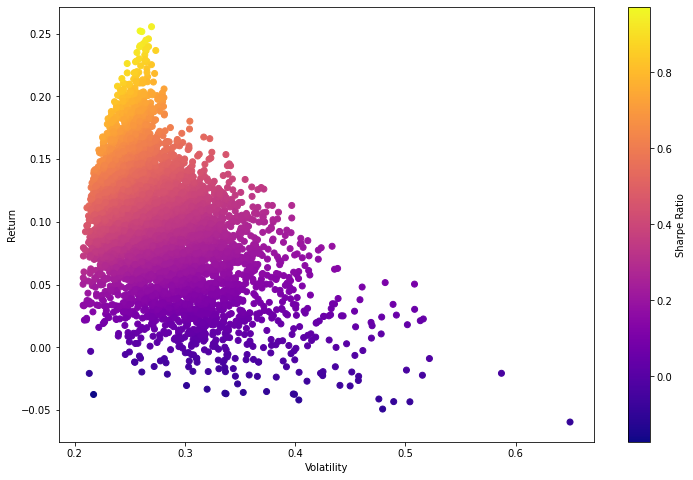

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [33]:
sharpe_arr.argmax()

2264

In [0]:
weightRatio = all_weights[2264]

In [35]:
weightRatio

array([0.02714734, 0.01398533, 0.29356315, 0.06537759, 0.59992659])

In [0]:
portfolioValue = []
for i in weightRatio:
  index = np.where(weightRatio == i)
  if(index[0] == 1):
    appleTemp = []
    for l in range(0,stocks['aapl'].last_valid_index()):
      appleTemp[l] = appleTemp[l]*stocks['aapl'].iloc(l)
    for index in range(0, appleTemp.last_valid_index()):
      portfolioValue[index] += appleTemp[index]
  if(index[0] == 2):
    googleTemp=[]
    for l in range(0,stocks['googl'].last_valid_index()):
      googleTemp[l] = googleTemp[l]*stocks['googl'].iloc(l)
    for index in range(0, googleTemp.last_valid_index()):
      portfolioValue[index] += googleTemp[index]
  if(index[0] == 3):
    fbTemp=[]
    for l in range(0,stocks['fb'].last_valid_index()):
      fbTemp[l] = fbTemp[l]*stocks['fb'].iloc(l)
    for index in range(0, fbTemp.last_valid_index()):
      portfolioValue[index] += fbTemp[index]
  if(index[0] == 4):
    ibmTemp=[]
    for l in range(0,stocks['ibm'].last_valid_index()):
      ibmTemp[l] = ibmTemp[l]*stocks['ibm'].iloc(l)
    for index in range(0, ibmTemp.last_valid_index()):
      portfolioValue[index] += ibmTemp[index]
  if(index[0] == 5):
    amznTemp=[]
    for l in range(0,stocks['amzn'].last_valid_index()):
      amznTemp[l] = amznTemp[l]*stocks['amzn'].iloc(l)
    for index in range(0, amznTemp.last_valid_index()):
      portfolioValue[index] += amznTemp[index]


In [0]:
fbTemp = weightRatio[0]*stocks['fb']

In [43]:
fbTemp

2013-01-02    0.760126
2013-01-03    0.753882
2013-01-04    0.780758
2013-01-07    0.798710
2013-01-08    0.788921
                ...   
2020-04-13    4.745084
2020-04-14    4.836842
2020-04-15    4.804265
2020-04-16    4.784719
2020-04-17    4.865889
Name: fb, Length: 1836, dtype: float64

In [44]:
stocks['fb']

2013-01-02     28.0000
2013-01-03     27.7700
2013-01-04     28.7600
2013-01-07     29.4213
2013-01-08     29.0607
                ...   
2020-04-13    174.7900
2020-04-14    178.1700
2020-04-15    176.9700
2020-04-16    176.2500
2020-04-17    179.2400
Name: fb, Length: 1836, dtype: float64